In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
# Load Dataset

data = pd.read_csv("honey_dataset.csv")
print("Data Shape:", data.shape)
data.head()

Data Shape: (247903, 11)


,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


In [6]:
# Preprocessing
df = pd.get_dummies(data, columns=['Pollen_analysis'], drop_first=True)
print("Data shape after preprocessing:", df.shape)
df.head()

Data shape after preprocessing: (247903, 28)


,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price,...,Pollen_analysis_Heather,Pollen_analysis_Lavender,Pollen_analysis_Manuka,Pollen_analysis_Orange Blossom,Pollen_analysis_Rosemary,Pollen_analysis_Sage,Pollen_analysis_Sunflower,Pollen_analysis_Thyme,Pollen_analysis_Tupelo,Pollen_analysis_Wildflower
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,4844.50,0.68,645.24,...,False,False,False,False,False,False,False,False,False,False
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,6689.02,0.89,385.85,...,False,False,False,False,False,False,False,False,False,False
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,6883.60,0.66,639.64,...,False,False,False,False,False,False,False,False,False,False
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,7167.56,1.00,946.46,...,False,False,False,False,False,False,False,False,False,False
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,5125.44,1.00,432.62,...,False,False,False,False,False,False,False,False,False,False


# Train Model - Purity

In [9]:
# separate features and target
X_pu = df.drop(columns=['Purity', 'Price'])
y_pu = df['Purity']

# Split Train and Test data
X_train_pu, X_test_pu, y_train_pu, y_test_pu = train_test_split(
    X_pu, y_pu, test_size=0.2, random_state=42
)

In [11]:
# Linear Regression
lr_pu = LinearRegression()
lr_pu.fit(X_train_pu, y_train_pu)

y_pred_lr_pu = lr_pu.predict(X_test_pu)

rmse_lr_pu = np.sqrt(mean_squared_error(y_test_pu, y_pred_lr_pu))
r2_lr_pu = r2_score(y_test_pu, y_pred_lr_pu)

print("Linear Purity R2:", r2_lr_pu)

Linear Purity R2: 0.0733665928905175


In [12]:
# Random Forest
rf_pu = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_pu.fit(X_train_pu, y_train_pu)

y_pred_rf_pu = rf_pu.predict(X_test_pu)

rmse_rf_pu = np.sqrt(mean_squared_error(y_test_pu, y_pred_rf_pu))
r2_rf_pu = r2_score(y_test_pu, y_pred_rf_pu)

print("Random Forest Purity R2:", r2_rf_pu)

Random Forest Purity R2: 0.9814897958369566


In [13]:
# Gradient Boosting
gb_pu = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

gb_pu.fit(X_train_pu, y_train_pu)

y_pred_gb_pu = gb_pu.predict(X_test_pu)

rmse_gb_pu = np.sqrt(mean_squared_error(y_test_pu, y_pred_gb_pu))
r2_gb_pu = r2_score(y_test_pu, y_pred_gb_pu)

print("Gradient Boosting Purity R2:", r2_gb_pu)

Gradient Boosting Purity R2: 0.952792969856482


In [14]:
# Select Best model out of three
if r2_rf_pu > r2_lr_pu and r2_rf_pu > r2_gb_pu:
    final_purity_model = rf_pu
    purity_model_name = "RandomForest"

elif r2_gb_pu > r2_lr_pu and r2_gb_pu > r2_rf_pu:
    final_purity_model = gb_pu
    purity_model_name = "GradientBoosting"

else:
    final_purity_model = lr_pu
    purity_model_name = "LinearRegression"

print("Final Selected Purity Model:", purity_model_name)

Final Selected Purity Model: RandomForest


In [15]:
# save the model
joblib.dump(final_purity_model, "models/honey_purity_model.pkl")

joblib.dump(X_pu.columns.tolist(),
            "models/feature_columns_purity.pkl")

purity_metrics = {
    "Linear_R2": r2_lr_pu,
    "RF_R2": r2_rf_pu,
    "GB_R2": r2_gb_pu,
    "Best_Model": purity_model_name
}

## Train Model - Price

In [18]:
# Define features and target
X_pr = df.drop(columns=['Price'])
y_pr = df['Price']

# Split Train and Test data
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(
    X_pr, y_pr, test_size=0.2, random_state=42
)

In [19]:
# Linear Regression
lr_pr = LinearRegression()
lr_pr.fit(X_train_pr, y_train_pr)

y_pred_lr_pr = lr_pr.predict(X_test_pr)

r2_lr_pr = r2_score(y_test_pr, y_pred_lr_pr)
print("Linear Price R2:", r2_lr_pr)

Linear Price R2: 0.9769632458498284


In [20]:
# Random Forest
rf_pr = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_pr.fit(X_train_pr, y_train_pr)

y_pred_rf_pr = rf_pr.predict(X_test_pr)

r2_rf_pr = r2_score(y_test_pr, y_pred_rf_pr)
print("Random Forest Price R2:", r2_rf_pr)

Random Forest Price R2: 0.999999717339328


In [21]:
# Gradient Boosting
gb_pr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

gb_pr.fit(X_train_pr, y_train_pr)

y_pred_gb_pr = gb_pr.predict(X_test_pr)

r2_gb_pr = r2_score(y_test_pr, y_pred_gb_pr)
print("GB Price R2:", r2_gb_pr)

GB Price R2: 0.9716422093267335


In [22]:
# Select best model
if r2_rf_pr > r2_lr_pr and r2_rf_pr > r2_gb_pr:
    final_price_model = rf_pr
    price_model_name = "RandomForest"

elif r2_gb_pr > r2_lr_pr and r2_gb_pr > r2_rf_pr:
    final_price_model = gb_pr
    price_model_name = "GradientBoosting"

else:
    final_price_model = lr_pr
    price_model_name = "LinearRegression"

print("Final Selected Price Model:", price_model_name)

Final Selected Price Model: RandomForest


In [23]:
# Save price model
joblib.dump(final_price_model, "models/honey_price_model.pkl")

joblib.dump(X_pr.columns.tolist(),
            "models/feature_columns_price.pkl")

price_metrics = {
    "Linear_R2": r2_lr_pr,
    "RF_R2": r2_rf_pr,
    "GB_R2": r2_gb_pr,
    "Best_Model": price_model_name
}

## Visualization

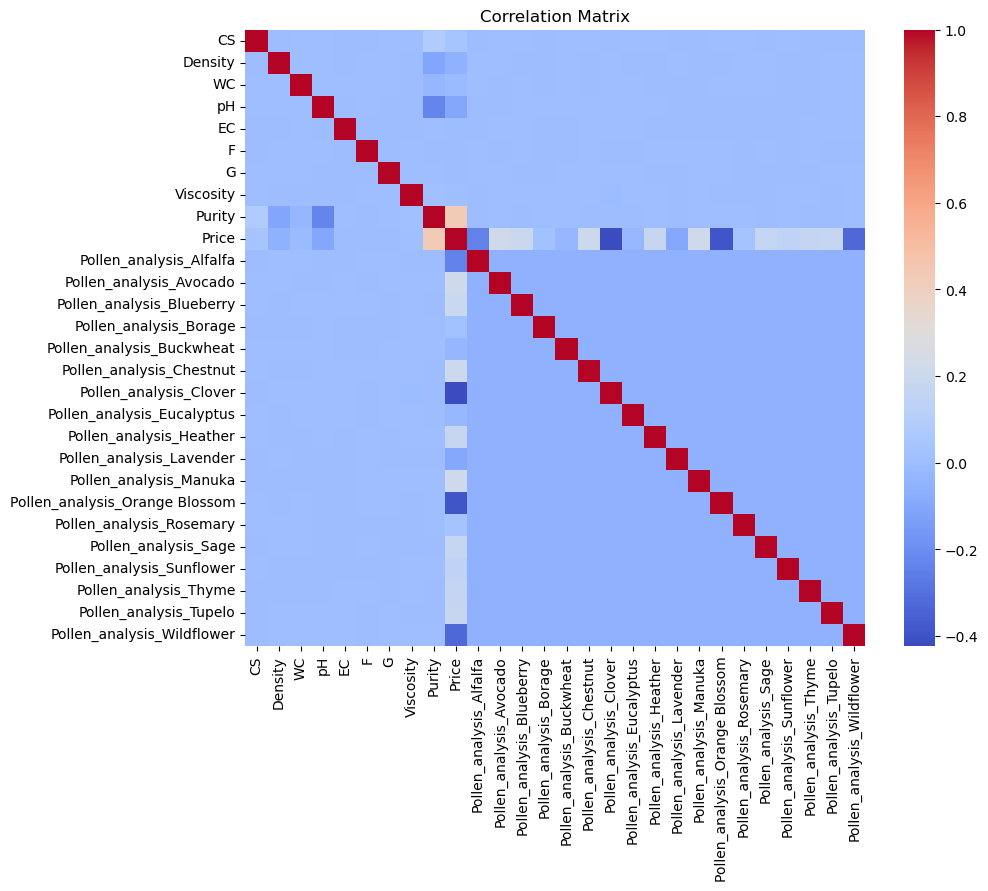

In [30]:
# Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.savefig("plots/correlation_matrix.png")
plt.show()

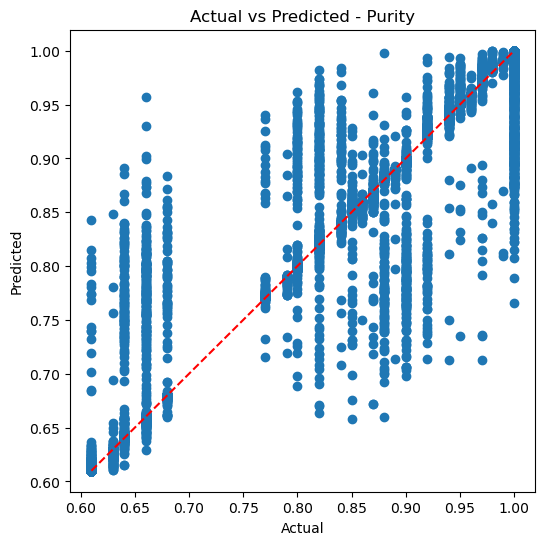

In [31]:
# Actual vs Predicted Plot - Purity
plt.figure(figsize=(6,6))
plt.scatter(y_test_pu,
            final_purity_model.predict(X_test_pu))
plt.plot([y_test_pu.min(), y_test_pu.max()],
         [y_test_pu.min(), y_test_pu.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Purity")
plt.savefig("plots/purity_actual_vs_predicted.png")
plt.show()

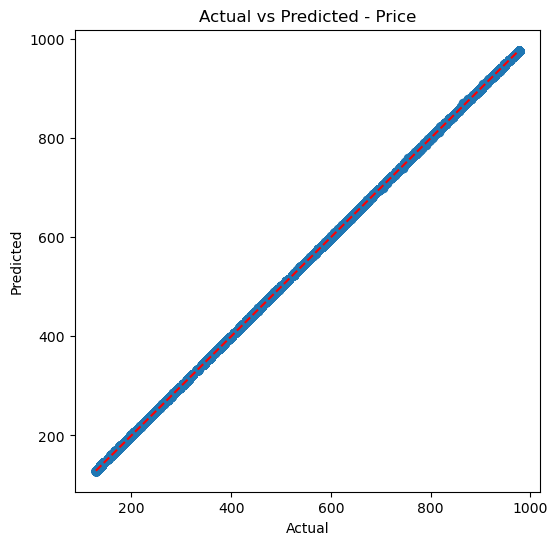

In [32]:
# Actual vs Predicted Plot - Purity
plt.figure(figsize=(6,6))
plt.scatter(y_test_pr,
            final_price_model.predict(X_test_pr))
plt.plot([y_test_pr.min(), y_test_pr.max()],
         [y_test_pr.min(), y_test_pr.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Price")
plt.savefig("plots/price_actual_vs_predicted.png")
plt.show()

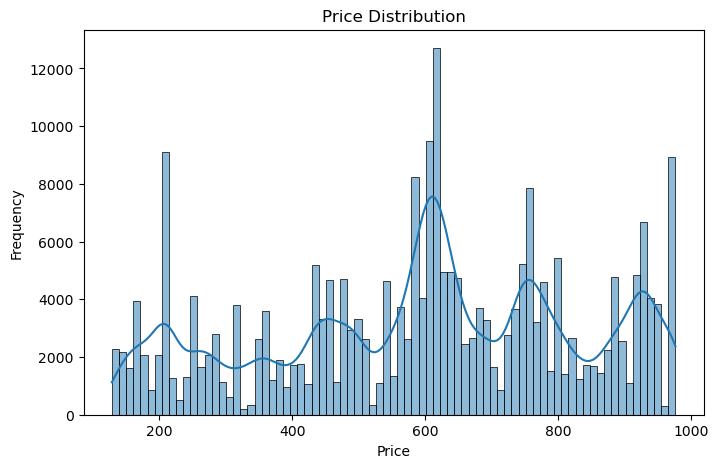

In [25]:
# Price Distribution:
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.savefig("plots/price_distribution.png")
plt.show()

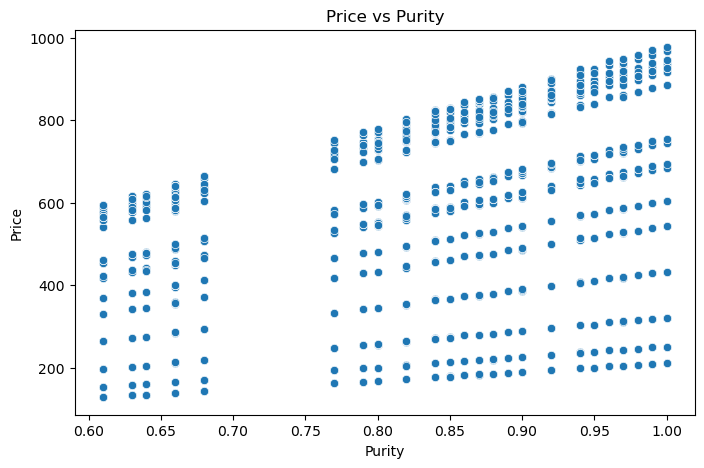

In [26]:
# Price vs Purity
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Purity"], y=df["Price"])
plt.title("Price vs Purity")
plt.xlabel("Purity")
plt.ylabel("Price")
plt.savefig("plots/price_vs_purity.png")
plt.show()

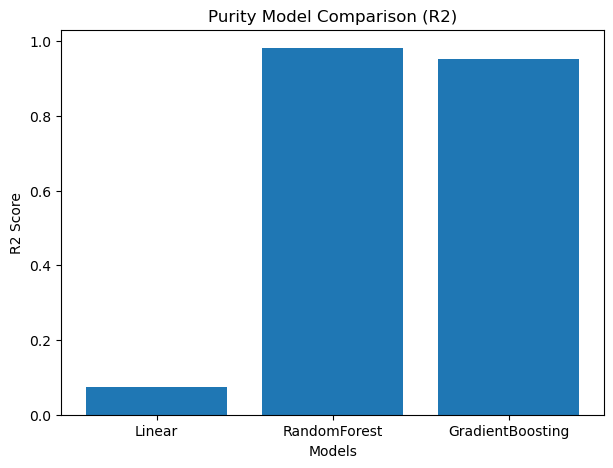

In [27]:
# Purity model comparison
models = ["Linear", "RandomForest", "GradientBoosting"]
r2_scores = [r2_lr_pu, r2_rf_pu, r2_gb_pu]

plt.figure(figsize=(7,5))
plt.bar(models, r2_scores)
plt.title("Purity Model Comparison (R2)")
plt.ylabel("R2 Score")
plt.xlabel("Models")
plt.savefig("plots/purity_model_comparison.png")
plt.show()

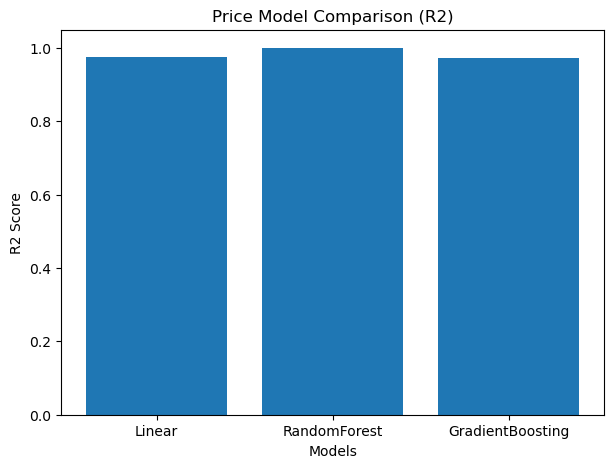

In [29]:
# Price model comparison
models = ["Linear", "RandomForest", "GradientBoosting"]
r2_scores = [r2_lr_pr, r2_rf_pr, r2_gb_pr]

plt.figure(figsize=(7,5))
plt.bar(models, r2_scores)
plt.title("Price Model Comparison (R2)")
plt.ylabel("R2 Score")
plt.xlabel("Models")
plt.savefig("plots/price_model_comparison.png")
plt.show()

<Figure size 1400x1000 with 0 Axes>

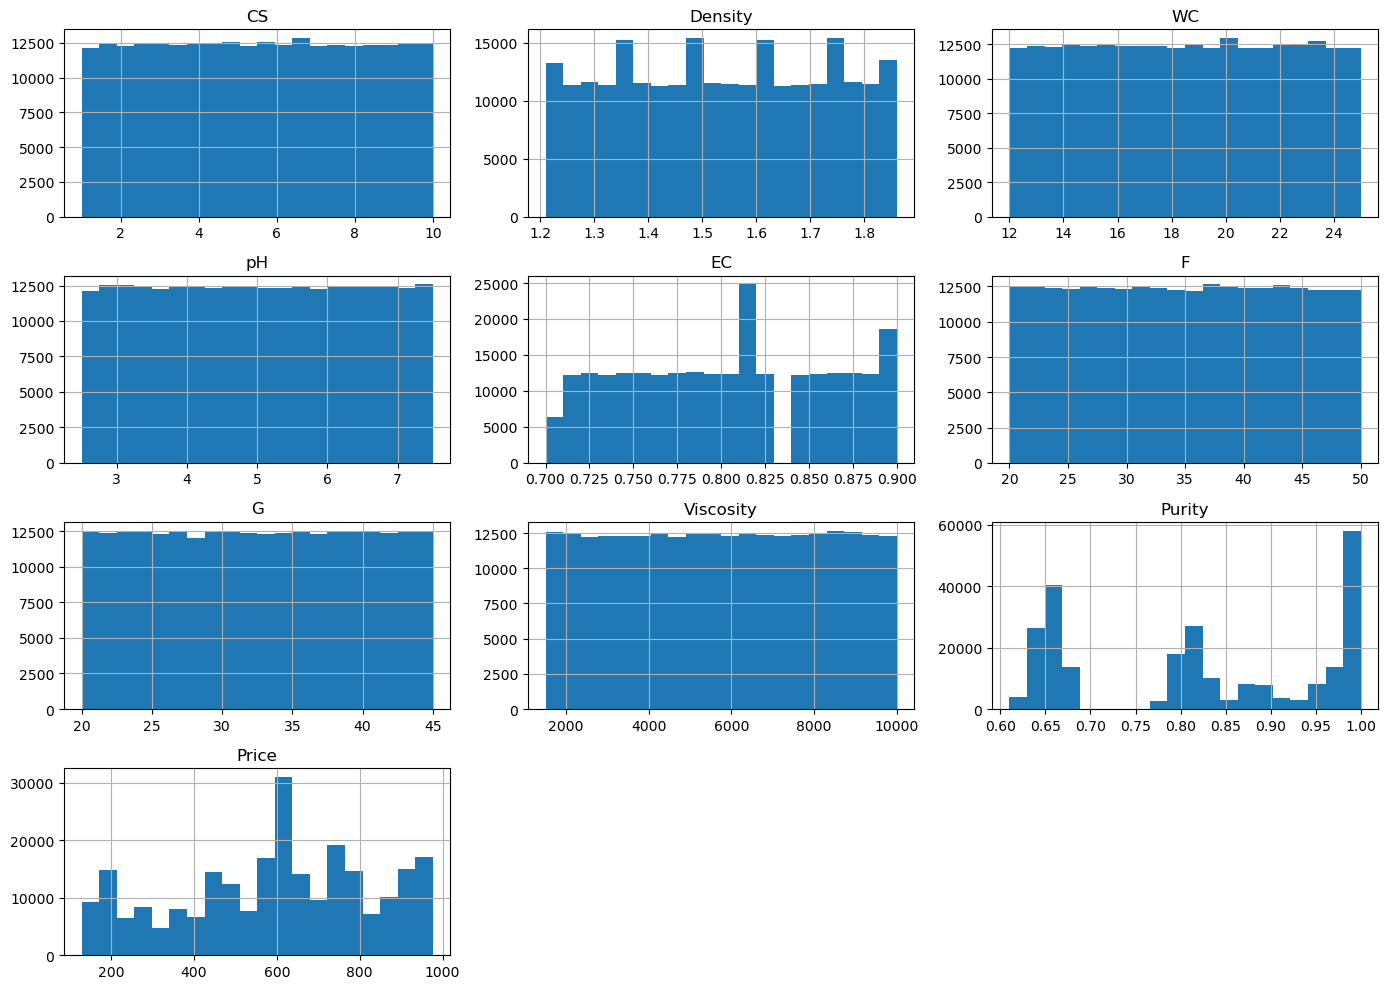

In [28]:
# Feature Distribution Plot
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(14,10))
numeric_df.hist(bins=20, figsize=(14,10))
plt.tight_layout()
plt.savefig("plots/feature_distribution.png")
plt.show()